In [68]:
'''
Author: Sriram Yarlagadda + George Nakhleh
Date Created: 9/12/2016
Note: Please use Python 2.7
'''
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir('C:\\Users\\gnakhleh\\Documents\\Loyola\\Spine Ileus') #Set location of home dir here.
#os.chdir('/Users/Sriram/Desktop/DePaul/Loyola-ILEUS-Analysis')#location in Mac

### Reading the Data

In [69]:
varLst = ['KEY','SCOLI','LOS','SHORT','LONG','ALIF','PLIF','ileus_NPOA', 'SCOLI_ILEUS','SHORT_ILEUS',\
          'LONG_ILEUS','ALIF_ILEUS','PLIF_ILEUS', 'DIED', 'MI_POA', 'MI_NPOA', 'DVT_POA', 'DVT_NPOA', 'Sepsis_POA', 'Sepsis_NPOA', 'PE_POA', 'PE_NPOA']
CAData = pd.read_stata('SPINE_ILEUS_CA.dta', columns=varLst)

In [70]:
CAData.to_csv('./CAData.csv')

In [71]:
CAData.columns

Index([u'KEY', u'SCOLI', u'LOS', u'SHORT', u'LONG', u'ALIF', u'PLIF',
       u'ileus_NPOA', u'SCOLI_ILEUS', u'SHORT_ILEUS', u'LONG_ILEUS',
       u'ALIF_ILEUS', u'PLIF_ILEUS', u'DIED', u'MI_POA', u'MI_NPOA',
       u'DVT_POA', u'DVT_NPOA', u'Sepsis_POA', u'Sepsis_NPOA', u'PE_POA',
       u'PE_NPOA'],
      dtype='object')

In [73]:
CAData.shape

(198557, 22)

In [74]:
CAData.describe()  #note that there are no patients with PE

,KEY,SCOLI,LOS,SHORT,LONG,ALIF,PLIF,ileus_NPOA,SCOLI_ILEUS,SHORT_ILEUS,...,PLIF_ILEUS,DIED,MI_POA,MI_NPOA,DVT_POA,DVT_NPOA,Sepsis_POA,Sepsis_NPOA,PE_POA,PE_NPOA
count,1.985570e+05,198557.000000,198553.000000,198557.000000,198557.000000,198557.000000,198557.000000,198557.000000,198557.000000,198557.000000,...,198557.000000,198544.000000,198557.000000,198557.000000,198557.000000,198557.000000,198557.000000,198557.000000,198557.0,198557.0
mean,6.200873e+12,0.870642,4.831481,0.798174,0.211551,0.149327,0.106660,0.026169,0.023409,0.019073,...,0.003984,0.003752,0.000579,0.002770,0.001501,0.003616,0.002090,0.005293,0.0,0.0
std,1.699881e+08,0.336071,22.353190,0.401497,0.408499,0.355765,0.309005,0.159243,0.151016,0.136434,...,0.062903,0.068153,0.024052,0.052513,0.038685,0.059937,0.045644,0.072438,0.0,0.0
min,6.200610e+12,0.000000,-6666.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,6.200713e+12,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,6.200911e+12,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,6.201012e+12,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,6.201114e+12,1.000000,358.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


### Data Preprocessing

In [75]:
np.sum(np.array(CAData < 0), 0)

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

As we can see there are only 4 negative values that need to be removed. In addition to this, we also scan for any NaNs:

In [76]:
np.sum(np.array(pd.isnull(CAData)),0)

array([ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,
        0,  0,  0,  0,  0])

There are 17 NaNs. We proceed to clean the data:

In [77]:
for feature in CAData.columns: 
    CAData = CAData[CAData[feature] >= 0]

In [78]:
CAData.shape

(198536, 22)

In [79]:
CAData.to_csv('./CAData_reduced.csv') 

### Answers to Questions

#### 1) Is there higher rate of ILEUS for patients that undergo ALIF?

We answer this question by looking at the ALIF and ileus_NPOA variables:

In [12]:
ct_ALIF = pd.crosstab(CAData.ALIF, CAData.ileus_NPOA); ct_ALIF#just the counts 

ileus_NPOA,0.0,1.0
ALIF,,
0.0,166023,2866
1.0,27318,2329


In [13]:
pd.crosstab(CAData.ALIF, CAData.ileus_NPOA).apply(lambda x: x/x.sum(),0) #The proportions

ileus_NPOA,0.0,1.0
ALIF,,
0.0,0.858706,0.551684
1.0,0.141294,0.448316


In [14]:
pd.crosstab(CAData.ALIF, CAData.ileus_NPOA).apply(lambda x: x/x.sum(),1) #Proportions view 2: ileus rate, ALIF vs no ALIF

ileus_NPOA,0.0,1.0
ALIF,,
0.0,0.983030,0.016970
1.0,0.921442,0.078558


In [15]:
from scipy import stats
# Testing if the difference in proportions is statistically significant using ChiSq
p_val = stats.chi2_contingency(ct_ALIF)[1]
print "p-value: ", p_val  

p-value:  0.0


In [16]:
#testing the proportion view 2, in case this is more appropriate
ct_ALIF_view2 = pd.crosstab(CAData.ileus_NPOA, CAData.ALIF)#just the counts 

p_val_view2 = stats.chi2_contingency(ct_ALIF_view2)[1]
print p_val_view2 

0.0


In [110]:
# T-test:
from scipy import stats

ttest_results = stats.ttest_ind(CAData[CAData.ALIF == 1.0].ileus_NPOA, CAData[CAData.ALIF != 1.0].ileus_NPOA)

print "T-test: ", ttest_results

T-test:  Ttest_indResult(statistic=61.857865201740495, pvalue=0.0)


#### 2) Is there higher rate of ILEUS for patients that undergo PLIF?

In [17]:
ct_PLIF = pd.crosstab(CAData.PLIF, CAData.ileus_NPOA); ct_PLIF#just the counts 

ileus_NPOA,0.0,1.0
PLIF,,
0.0,172954,4404
1.0,20387,791


In [18]:
pd.crosstab(CAData.PLIF, CAData.ileus_NPOA).apply(lambda x: x/x.sum(),0)

ileus_NPOA,0.0,1.0
PLIF,,
0.0,0.894554,0.847738
1.0,0.105446,0.152262


In [19]:
#same analysis, flipped
ct_PLIF_view2 = pd.crosstab(CAData.ileus_NPOA, CAData.PLIF); ct_PLIF_view2#just the counts

PLIF,0.0,1.0
ileus_NPOA,,
0.0,172954,20387
1.0,4404,791


In [20]:
pd.crosstab(CAData.ileus_NPOA, CAData.PLIF).apply(lambda x: x/x.sum(),0)

PLIF,0.0,1.0
ileus_NPOA,,
0.0,0.975169,0.96265
1.0,0.024831,0.03735


In [21]:
p_val = stats.chi2_contingency(ct_PLIF)[1]
print "p-value: ", p_val  

p-value:  5.07870604204e-27


In [22]:
p_val_view2 = stats.chi2_contingency(ct_PLIF_view2)[1]
print "p-value: ", p_val_view2 #odd that this is the same thing

p-value:  5.07870604204e-27


In [109]:
#t-test:

ttest_results = stats.ttest_ind(CAData[CAData.PLIF == 1.0].ileus_NPOA, CAData[CAData.PLIF != 1.0].ileus_NPOA)

print "T-test: ", ttest_results


T-test:  Ttest_indResult(statistic=10.79010561924864, pvalue=3.9005952551227336e-27)


#### 3) Is there higher rate of ILEUS for patients that undergo ALIF vs PLIF (as past studies have shown)?

In [81]:
#For this we only look at cases where PLIF or ALIF is 1
CADataSub = CAData[(CAData.PLIF == 1) | (CAData.ALIF==1)]; CADataSub.shape #we have 47K cases

(47056, 22)

In [82]:
np.sum(CADataSub.PLIF == CADataSub.ALIF) #however there are 3769 cases where ALIF and PLIF are both True. 
#Such cases are removed

3769

In [83]:
CADataSub = CADataSub[(CAData.PLIF + CAData.ALIF) ==1]; CADataSub.shape #all such cases are removed

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


(43287, 22)

In [84]:
pd.crosstab(CADataSub.ALIF, CADataSub.PLIF)

PLIF,0.0,1.0
ALIF,,
0.0,0,17409
1.0,25878,0


In [91]:
# We now look at a contingency table for both these cases
ct_PvA = pd.crosstab(CADataSub.ileus_NPOA, [CADataSub.PLIF, CADataSub.ALIF]); ct_PvA#just the counts 
# We only need to compare based on one of the columns since PLIF == 0 would mean ALIF == 1 anyway

PLIF,0.0,1.0
ALIF,1.0,0.0
ileus_NPOA,,
0.0,23921,16990
1.0,1957,419


In [87]:
pd.crosstab(CADataSub.ileus_NPOA, [CADataSub.PLIF, CADataSub.ALIF]).apply(lambda x: x/x.sum(),0)

PLIF,0.0,1.0
ALIF,1.0,0.0
ileus_NPOA,,
0.0,0.924376,0.975932
1.0,0.075624,0.024068


In [88]:
#Let us test using a ChiSq to check if the difference is significant:
p_val = stats.chi2_contingency(ct_PvA)[1]
print "p-value: ", p_val#The p-value indicates the difference is significant.

p-value:  9.09637200815e-118


In [111]:
# t-test:

ttest_results = stats.ttest_ind(CADataSub[CADataSub.PLIF == 1.0].ileus_NPOA, CADataSub[CADataSub.PLIF != 1.0].ileus_NPOA)

print "T-test: ", ttest_results

T-test:  Ttest_indResult(statistic=-23.235346257276511, pvalue=1.06912758230179e-118)


In [92]:
#Within that, of those who got ileuses from ALIF and PLIF surgeries, were those ileuses more severe?

CADataSub_haveileus = CADataSub[CADataSub['ileus_NPOA'] == 1]
CADataSub_haveileus[['ileus_NPOA', 'PLIF', 'ALIF', 'LOS']].groupby('PLIF').aggregate(np.median)


,ileus_NPOA,ALIF,LOS
PLIF,,,
0.0,1.0,1.0,6.0
1.0,1.0,0.0,6.0


In [93]:
pd.crosstab(CADataSub_haveileus.ALIF, CADataSub_haveileus.PLIF)

PLIF,0.0,1.0
ALIF,,
0.0,0,419
1.0,1957,0


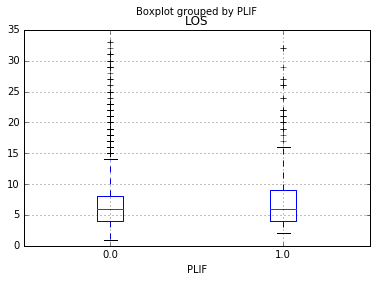

In [133]:
#Look at the difference in distributions between LOS by surgery

#Remove LOS outliers from our subset data
CADataSub_haveileus_nolosoutliers = CADataSub_haveileus[np.abs(CADataSub_haveileus.LOS-CADataSub_haveileus.LOS.mean())<=(3*CADataSub_haveileus.LOS.std())]

#plot as a boxplot
#note that PLIF = 0 is the equivalent of ALIF = 1 in this subset data
CADataSub_haveileus_nolosoutliers.boxplot(column = "LOS", by= "PLIF")



#### 4) Does length of Fusion (Long vs Short) has an impact on ILEUS?

In [112]:
# Repeating a similar procedure as question 3
CADataSub = CAData[(CAData.LONG == 1) | (CAData.SHORT==1)]; CADataSub.shape #we have 195K cases

(195694, 22)

In [113]:
np.sum(CADataSub.LONG == CADataSub.SHORT)

4772

In [114]:
#however there are 4772 cases where ALIF and PLIF are both True. 
CADataSub = CADataSub[(CAData.LONG + CAData.SHORT) ==1]; CADataSub.shape #all such cases are removed

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


(190922, 22)

In [115]:
# We now look at a contingency table for both these cases
ct_LvS = pd.crosstab(CADataSub.ileus_NPOA, [CADataSub.LONG, CADataSub.SHORT]); ct_LvS#just the counts

LONG,0.0,1.0
SHORT,1.0,0.0
ileus_NPOA,,
0.0,150233,35873
1.0,3465,1351


In [116]:
pd.crosstab(CADataSub.ileus_NPOA, [CADataSub.LONG, CADataSub.SHORT]).apply(lambda x: x/x.sum(),0)

LONG,0.0,1.0
SHORT,1.0,0.0
ileus_NPOA,,
0.0,0.977456,0.963706
1.0,0.022544,0.036294


In [117]:
# We perform a chi-sq test

p_val = stats.chi2_contingency(ct_LvS)[1]
print "p-value: ", p_val#The p-value indicates the difference is significant. However, the difference is quite small.

p-value:  6.46198767113e-52


In [118]:
#T-test:

ttest_results = stats.ttest_ind(CADataSub[CADataSub.LONG == 1.0].ileus_NPOA, CADataSub[CADataSub.LONG != 1.0].ileus_NPOA)

print "T-test: ", ttest_results

T-test:  Ttest_indResult(statistic=15.187961528409218, pvalue=4.5584220040467011e-52)


#### 5) Does ILEUS affect LOS?

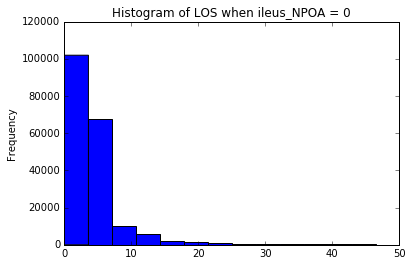

In [39]:
# Let us look at the distribution of LOS by different ILEUS categories
CAData[CAData.ileus_NPOA == 0.].LOS.plot('hist', xlim=(0,50), bins = 100) #zooming in to avoid outliers
plt.title('Histogram of LOS when ileus_NPOA = 0'); plt.show()

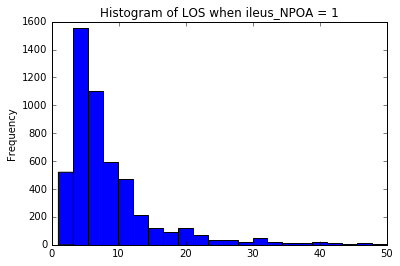

In [38]:
CAData[CAData.ileus_NPOA == 1.].LOS.plot('hist', xlim=(0,50), bins = 100) #zooming in to avoid outliers
plt.title('Histogram of LOS when ileus_NPOA = 1'); plt.show()

In [40]:
group1_LOS =  CAData[CAData.ileus_NPOA == 0.].LOS
group2_LOS =  CAData[CAData.ileus_NPOA == 1.].LOS
print "The median LOS of ileus_NPOA = 0 is ", group1_LOS.median()
print "The median LOS of ileus_NPOA = 1 is ", group2_LOS.median()

The median LOS of ileus_NPOA = 0 is  3.0
The median LOS of ileus_NPOA = 1 is  6.0


In [41]:
#Are hospital stays for those w/ ilesuses longer?
#Using the Wilcox rank-sum statistic (link: http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html)
z_stat, p_val = stats.ranksums(group1_LOS, group2_LOS)
print "p-value: ", p_val  #Test is significant --> The LOS of the ILEUS group is higher than the non-ILEUS group

p-value:  0.0


In [139]:
#Within that, are there differences in length-of-stay based on the surgery related to the ileus

#crosstab
pd.crosstab(CAData.ileus_NPOA, [CAData.PLIF, CAData.ALIF, CAData.LONG, CAData.SHORT], values = CAData.LOS, aggfunc = "mean")

PLIF              0.0                                                        \
ALIF              0.0                                         1.0             
LONG              0.0                   1.0                   0.0             
SHORT             0.0        1.0        0.0        1.0        0.0       1.0   
ileus_NPOA                                                                    
0.0          7.253793   3.908715   7.101853  18.024793   7.765217  4.536553   
1.0         14.394737  10.043272  14.417411  23.852941  26.750000  6.502833   

PLIF                                  1.0                                 
ALIF                                  0.0                  1.0            
LONG             1.0                  0.0        1.0       0.0       1.0  
SHORT            0.0        1.0       1.0        1.0       1.0       1.0  
ileus_NPOA                                                                
0.0         7.430272  11.309677  4.292542   5.872324  4.693062  7.083851  
1.0         9.630769  14.442857  8.035370  10.351852  6.623574  9.119266

In [144]:
pd.crosstab(CAData.ileus_NPOA, [CAData.PLIF, CAData.ALIF, CAData.LONG, CAData.SHORT]).apply(lambda x: x/x.sum(), 0)

PLIF             0.0                                                   \
ALIF             0.0                                     1.0            
LONG             0.0                 1.0                 0.0            
SHORT            0.0       1.0       0.0       1.0       0.0      1.0   
ileus_NPOA                                                              
0.0         0.984659  0.987111  0.973247  0.955263  0.945205  0.93354   
1.0         0.015341  0.012889  0.026753  0.044737  0.054795  0.06646   

PLIF                                 1.0                                
ALIF                                 0.0                 1.0            
LONG             1.0                 0.0       1.0       0.0       1.0  
SHORT            0.0       1.0       1.0       1.0       1.0       1.0  
ileus_NPOA                                                              
0.0         0.878081  0.869159  0.978822  0.960352  0.912798  0.855246  
1.0         0.121919  0.130841  0.021178  0.039648  0.087202  0.144754

#### 6) Does ILEUS affect death?

In [119]:
ct_DIED = pd.crosstab(CAData.DIED, CAData.ileus_NPOA); ct_DIED#just the counts 

ileus_NPOA,0.0,1.0
DIED,,
0.0,192640,5137
1.0,701,58


In [120]:
pd.crosstab(CAData.DIED, CAData.ileus_NPOA).apply(lambda x: x/x.sum(),0)

ileus_NPOA,0.0,1.0
DIED,,
0.0,0.996374,0.988835
1.0,0.003626,0.011165


In [44]:
# performing a ChiSq test
p_val = stats.chi2_contingency(ct_DIED)[1]
print "p-value: ", p_val #The p-value indicates the difference is significant.

p-value:  9.89814701517e-18


In [121]:
# t-test:

ttest_results = stats.ttest_ind(CAData[CAData.ileus_NPOA == 1.0].DIED, CAData[CAData.ileus_NPOA != 1.0].DIED)

print "T-test: ", ttest_results

T-test:  Ttest_indResult(statistic=8.6906421576535191, pvalue=3.6306259235453461e-18)


#### 7) Does ILEUS affect PE? (On hold for now, not in dataset)

#### 8) Does ILEUS affect DVT?

In [122]:
ct_dvt = pd.crosstab(CAData.DVT_NPOA, CAData.ileus_NPOA); ct_dvt

ileus_NPOA,0.0,1.0
DVT_NPOA,,
0.0,192721,5098
1.0,620,97


In [123]:
#Look at proportions: did people who developed ileuses also develop DVT?
ct_dvt.apply(lambda x: x/x.sum(), 0)

ileus_NPOA,0.0,1.0
DVT_NPOA,,
0.0,0.996793,0.981328
1.0,0.003207,0.018672


In [124]:
#Is this significant?
p_val = stats.chi2_contingency(ct_dvt)[1]
print "p-value: ", p_val #The p-value indicates the difference is significant.
#DVT is rare in both cases, though

p-value:  3.5846778343e-74


In [126]:
#t-test

ttest_results = stats.ttest_ind(CAData[CAData.ileus_NPOA == 1.0].DVT_NPOA, CAData[CAData.ileus_NPOA != 1.0].DVT_NPOA)

print "T-test: ", ttest_results

T-test:  Ttest_indResult(statistic=18.352596993817269, pvalue=3.6328009265887671e-75)


#### 9) Does ILEUS affect MI (heart attack)?

In [48]:
ct_mi = pd.crosstab(CAData.MI_NPOA, CAData.ileus_NPOA); ct_mi

ileus_NPOA,0.0,1.0
MI_NPOA,,
0.0,192823,5164
1.0,518,31


In [49]:
ct_mi.apply(lambda x: x/x.sum(), 0)

ileus_NPOA,0.0,1.0
MI_NPOA,,
0.0,0.997321,0.994033
1.0,0.002679,0.005967


In [50]:
#Is this significant?
p_val = stats.chi2_contingency(ct_mi)[1]
print "p-value: ", p_val #The p-value indicates the difference is significant.
#DVT is very rare in both cases, though

p-value:  1.56217188474e-05


In [127]:
#ttest
ttest_results = stats.ttest_ind(CAData[CAData.ileus_NPOA == 1.0].MI_NPOA, CAData[CAData.ileus_NPOA != 1.0].MI_NPOA)

print "T-test: ", ttest_results

T-test:  Ttest_indResult(statistic=4.4538005268542502, pvalue=8.440943308200258e-06)


#### 10) Does ILEUS affect sepsis?

In [51]:
ct_sepsis = pd.crosstab(CAData.Sepsis_NPOA, CAData.ileus_NPOA); ct_sepsis

ileus_NPOA,0.0,1.0
Sepsis_NPOA,,
0.0,192435,5054
1.0,906,141


In [52]:
ct_sepsis.apply(lambda x: x/x.sum(), 0)

ileus_NPOA,0.0,1.0
Sepsis_NPOA,,
0.0,0.995314,0.972859
1.0,0.004686,0.027141


In [53]:
#Is this significant?
p_val = stats.chi2_contingency(ct_mi)[1]
print "p-value: ", p_val #The p-value indicates the difference is significant.
#DVT is very rare in both cases, though

p-value:  1.56217188474e-05


In [128]:
#ttest
ttest_results = stats.ttest_ind(CAData[CAData.ileus_NPOA == 1.0].Sepsis_NPOA, CAData[CAData.ileus_NPOA != 1.0].Sepsis_NPOA)

print "T-test: ", ttest_results

T-test:  Ttest_indResult(statistic=22.079129488816758, pvalue=6.7715542306986301e-108)


Questions to Answer:

1) Is there higher rate of ILEUS for patients that undergo ALIF?

2) Is there higher rate of ILEUS for patients that undergo PLIF?

3) Is there higher rate of ILEUS for patients that undergo ALIF vs PLIF (as past studies have shown)?

4) Does length of Fusion (Long vs Short) has an impact on ILEUS?

5) Does ILEUS affect LOS?

6) Does ILEUS affect death?

7) Does ILEUS affect PE?

8) Does ILEUS affect DVT?

9) Does ILEUS affect MI?

10) Does ILEUS affect sepsis?